## Imports

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Data load

In [29]:
df = pd.read_csv("data.csv")

In [30]:
df

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2024,202401,NaN,NaN,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2024,202402,NaN,NaN,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2024,202403,NaN,NaN,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2024,202404,NaN,NaN,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2024,202405,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2249,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0,NaN,-13.04,NaN,584.0
2250,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0,NaN,4.33,NaN,594.0
2251,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0,NaN,-8.89,NaN,596.0
2252,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0,NaN,-6.02,NaN,594.0


## Analysis

In [51]:
df["AUSPRAEGUNG"].unique()

array(['insgesamt', 'Verletzte und Getötete', 'mit Personenschäden'],
      dtype=object)

In [52]:
df["MONATSZAHL"].unique()

array(['Alkoholunfälle', 'Fluchtunfälle', 'Verkehrsunfälle'], dtype=object)

In [53]:
df_cat = df[(df["AUSPRAEGUNG"] == "insgesamt") & (df["MONAT"] == "Summe")]

In [54]:
df_cat

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
24,Alkoholunfälle,insgesamt,2022,Summe,493.0,383.0,NaN,28.72,NaN
37,Alkoholunfälle,insgesamt,2021,Summe,383.0,430.0,NaN,-10.93,NaN
50,Alkoholunfälle,insgesamt,2020,Summe,430.0,434.0,NaN,-0.92,NaN
63,Alkoholunfälle,insgesamt,2019,Summe,434.0,398.0,NaN,9.05,NaN
76,Alkoholunfälle,insgesamt,2018,Summe,398.0,409.0,NaN,-2.69,NaN
...,...,...,...,...,...,...,...,...,...
1533,Verkehrsunfälle,insgesamt,2005,Summe,40723.0,40064.0,NaN,1.64,NaN
1546,Verkehrsunfälle,insgesamt,2004,Summe,40064.0,38635.0,NaN,3.70,NaN
1559,Verkehrsunfälle,insgesamt,2003,Summe,38635.0,40608.0,NaN,-4.86,NaN
1572,Verkehrsunfälle,insgesamt,2002,Summe,40608.0,45713.0,NaN,-11.17,NaN


In [55]:
# calculating sum for the months of 2001, as these figures are not in the dataset
df[(df["AUSPRAEGUNG"] == "insgesamt") & (df["JAHR"] == 2000)][["MONATSZAHL", "AUSPRAEGUNG", "WERT"]].groupby("MONATSZAHL").sum("WERT")

,WERT
MONATSZAHL,
Alkoholunfälle,934.0
Fluchtunfälle,11467.0
Verkehrsunfälle,44494.0


In [56]:
new_rows = pd.DataFrame({'MONATSZAHL': ['Alkoholunfälle', "Fluchtunfälle", "Verkehrsunfälle"], 'WERT': [934.0, 11467.0, 44494.0
], "JAHR": [2000, 2000, 2000]})

In [57]:
new_rows

,MONATSZAHL,WERT,JAHR
0,Alkoholunfälle,934.0,2000
1,Fluchtunfälle,11467.0,2000
2,Verkehrsunfälle,44494.0,2000


In [58]:
df_cat = pd.concat([df_cat, new_rows], ignore_index=True)

In [59]:
df_cat

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2022,Summe,493.0,383.0,NaN,28.72,NaN
1,Alkoholunfälle,insgesamt,2021,Summe,383.0,430.0,NaN,-10.93,NaN
2,Alkoholunfälle,insgesamt,2020,Summe,430.0,434.0,NaN,-0.92,NaN
3,Alkoholunfälle,insgesamt,2019,Summe,434.0,398.0,NaN,9.05,NaN
4,Alkoholunfälle,insgesamt,2018,Summe,398.0,409.0,NaN,-2.69,NaN
...,...,...,...,...,...,...,...,...,...
64,Verkehrsunfälle,insgesamt,2002,Summe,40608.0,45713.0,NaN,-11.17,NaN
65,Verkehrsunfälle,insgesamt,2001,Summe,45713.0,44494.0,NaN,2.74,NaN
66,Alkoholunfälle,NaN,2000,NaN,934.0,NaN,NaN,NaN,NaN
67,Fluchtunfälle,NaN,2000,NaN,11467.0,NaN,NaN,NaN,NaN


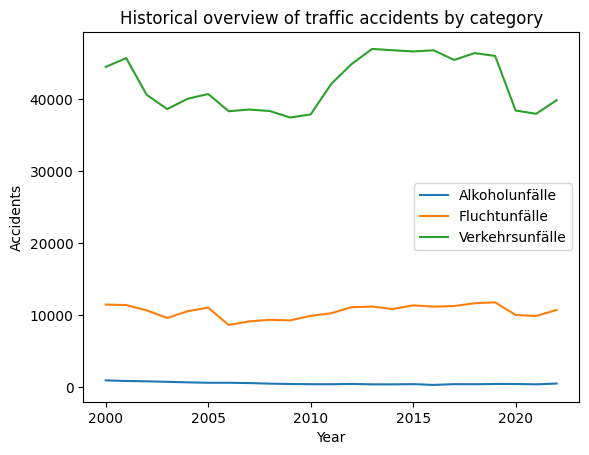

In [60]:
for cat in df["MONATSZAHL"].unique():
    df_tmp = df_cat[df_cat["MONATSZAHL"] == cat]
    plt.plot(df_tmp["JAHR"], df_tmp["WERT"], label=cat)


plt.xlabel("Year")
plt.ylabel("Accidents")
plt.xticks([2000, 2005, 2010, 2015, 2020])
plt.title("Historical overview of traffic accidents by category")
plt.legend()

plt.show()

## Prediction

In [61]:
df = df[(df["MONATSZAHL"] == "Alkoholunfälle") & (df["MONAT"] != "Summe") & (df["AUSPRAEGUNG"] == "insgesamt")]

In [62]:
df = df.dropna()

In [63]:
df['month_date'] = pd.to_datetime(df['MONAT'].astype(str), format='%Y%m')

In [64]:
df = df.sort_values(by='month_date', ascending=True).reset_index(drop=True)

In [65]:
df

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT,month_date
0,Alkoholunfälle,insgesamt,2001,200101,66.0,78.0,-22.35,-15.38,77.0,2001-01-01
1,Alkoholunfälle,insgesamt,2001,200102,49.0,53.0,-25.76,-7.55,77.0,2001-02-01
2,Alkoholunfälle,insgesamt,2001,200103,63.0,73.0,28.57,-13.70,76.0,2001-03-01
3,Alkoholunfälle,insgesamt,2001,200104,68.0,78.0,7.94,-12.82,75.0,2001-04-01
4,Alkoholunfälle,insgesamt,2001,200105,85.0,96.0,25.00,-11.46,74.0,2001-05-01
...,...,...,...,...,...,...,...,...,...,...
259,Alkoholunfälle,insgesamt,2022,202208,44.0,46.0,-18.52,-4.35,40.0,2022-08-01
260,Alkoholunfälle,insgesamt,2022,202209,56.0,54.0,27.27,3.70,40.0,2022-09-01
261,Alkoholunfälle,insgesamt,2022,202210,49.0,43.0,-12.50,13.95,41.0,2022-10-01
262,Alkoholunfälle,insgesamt,2022,202211,28.0,33.0,-42.86,-15.15,40.0,2022-11-01


In [72]:
# using the precomputed lagged variables from the original dataset
X = df[["VORJAHRESWERT", "VERAEND_VORMONAT_PROZENT", "VERAEND_VORJAHRESMONAT_PROZENT", "ZWOELF_MONATE_MITTELWERT"]]
y = df["WERT"]

In [67]:
# up to 2020 is training data, afterwards is test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=12*20, shuffle=False)


In [68]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [69]:
y_pred = model.predict(X_test)

In [70]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 7.15


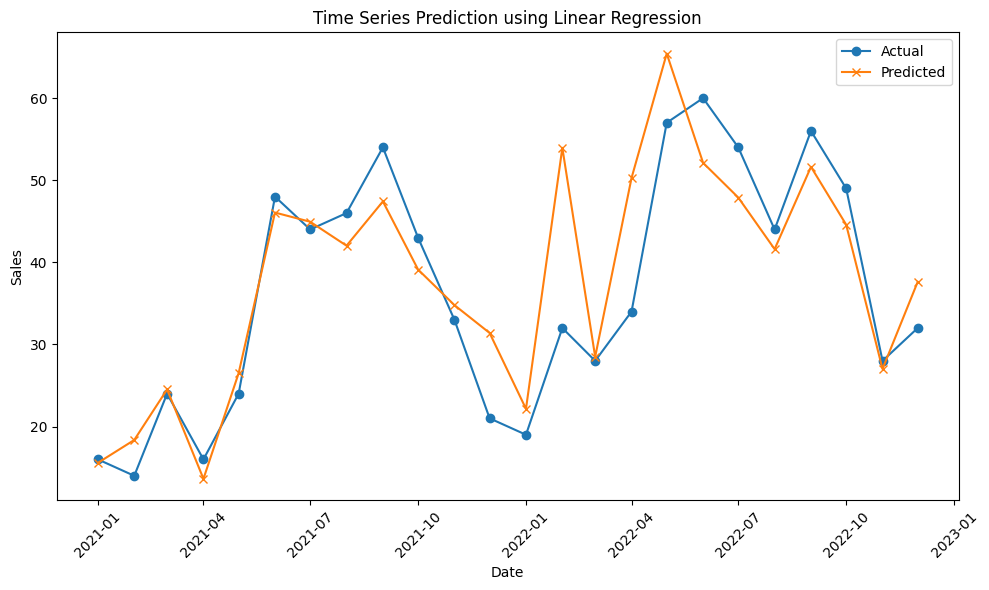

In [71]:
plt.figure(figsize=(10, 6))
plt.plot(df['month_date'][-len(y_test):], y_test, label='Actual', marker='o')
plt.plot(df['month_date'][-len(y_test):], y_pred, label='Predicted', marker='x')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Time Series Prediction using Linear Regression')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
model.predict([[28, 23.08, -42.86, 35]])

/Users/ivanahacajova/Documents/DPS/DPS-AI-Challenge/env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15.57624438])

## Save model

In [124]:
with open('model.pkl','wb') as f:
    pickle.dump(model,f)